# Part 2 - Car Sales on AA
## by Philip Obiorah

### Introduction
 "The AA believe in AA Cars as a valuable tool for people looking to buy a used car."(AA Cars 2023).  The aim of this work is to build a dataset on cars sales. The data is collected from AA website (https://www.theaa.com/cars/). Our objectives includes to : 
- (a) collect 1000 items returned by search query of the website and save them into csv files. Data collected would include:

|     |     |
| --- | --- |
|Sale’s title|CO2 Emissions|
|Location/ Distance|Transmission
|Price|Number of seats
|Year|Colour 
|Mileage|Engine size
|Fuel Type|Number of Reviews
|Body Type|Rating 

- b)Identify any problems with the data and clean accordingly.
- c)Calculate the total car sales based on the “year” feature 
- d)Compare car sales on their transmission features 
- e)What are the most popular car sales based on the “Body Type”? 
- f)List top 10 cars having highest numbers of reviews. 
We shall employ BeautifulSoup and Requests python libraries and also different means of data  acquisition  (scraping), cleaning, and exploration to archive our objective. 

### Gathering

In [656]:
# import the required libraries
import csv
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import matplotlib.pyplot as plt

In [483]:
#initialize the variables required
page_count = 1
car_urls = []
base_url = "https://www.theaa.com"
url = "https://www.theaa.com/used-cars/displaycars?fullpostcode=MK18%201EG&travel=2000&page="
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
}
car_link = ""


# Set the name of the output file
output_file = 'AAcars_data.csv'

# Set up the CSV writer
csv_file = open(output_file, 'w', newline='')
csv_writer = csv.writer(csv_file)

# Write the header row
csv_writer.writerow(['sales_title', 'url', 'location'])

# loop using range of no. required
for page_count in range(1, 51):
    
    try:
        # Send a request to the server
        response = requests.get(url + str(page_count), headers=headers)
        
        
        
        time.sleep(5)
    except requests.HTTPError as err: 
        print(err)    
        
    except requests.ConnectionError as cerr:
        print(cerr)  
        
        
    else:
        print(response.status_code,":" ,end="")
        print(page_count, ":Receiving..",url + str(page_count))
        
   
    # Let's use BeautifulSoup to parse the response content
    soup = BeautifulSoup(response.content, "html.parser")
    # use soup object to extract html elements in the div with class : vl-item clearfix
    car_listings_page = soup.find_all("div", {"class": "vl-item clearfix"})
    
    #for each car in the car_listing page
    for car in car_listings_page:
        car_link = base_url + car.find("h3", {"class": "vl-title"}).find("a", {"class":"black-link"}).get("href").strip()
        sales_title = car.find("h3", {"class": "vl-title"}).get('title').strip()
        location = car.find("div", {"class":"vl-location"}).contents[1].text.strip()
        #car_urls.append(car_link)
        # Write the data to the CSV file (save sales_tilte, url, and location )
        csv_writer.writerow([sales_title.strip(), car_link,location])

            
# Close the CSV file
csv_file.close()        

200 :1 :Receiving.. https://www.theaa.com/used-cars/displaycars?fullpostcode=MK18%201EG&travel=2000&page=1
200 :2 :Receiving.. https://www.theaa.com/used-cars/displaycars?fullpostcode=MK18%201EG&travel=2000&page=2
200 :3 :Receiving.. https://www.theaa.com/used-cars/displaycars?fullpostcode=MK18%201EG&travel=2000&page=3
200 :4 :Receiving.. https://www.theaa.com/used-cars/displaycars?fullpostcode=MK18%201EG&travel=2000&page=4
200 :5 :Receiving.. https://www.theaa.com/used-cars/displaycars?fullpostcode=MK18%201EG&travel=2000&page=5
200 :6 :Receiving.. https://www.theaa.com/used-cars/displaycars?fullpostcode=MK18%201EG&travel=2000&page=6
200 :7 :Receiving.. https://www.theaa.com/used-cars/displaycars?fullpostcode=MK18%201EG&travel=2000&page=7
200 :8 :Receiving.. https://www.theaa.com/used-cars/displaycars?fullpostcode=MK18%201EG&travel=2000&page=8
200 :9 :Receiving.. https://www.theaa.com/used-cars/displaycars?fullpostcode=MK18%201EG&travel=2000&page=9
200 :10 :Receiving.. https://www.thea

Data containing sales_tilte, url, and location from the url (https://www.theaa.com/used-cars/displaycars?fullpostcode=MK18%201EG&travel=2000&page=50 )sample save is saved as `AAcars_data.csv` 

In [484]:
# Load data from CSV file
df = pd.read_csv('AAcars_data.csv', names=['sales_title', 'url','location'], header=None, skiprows=1, sep=',')

df

,sales_title,url,location
0,Ford Ka+ 1.2 85 Zetec 5dr,https://www.theaa.com/used-cars/cardetails/137...,500 yards
1,Fiat 500 1.2 Lounge 3dr,https://www.theaa.com/used-cars/cardetails/137...,500 yards
2,Ford Fiesta 1.0 EcoBoost Zetec 3dr,https://www.theaa.com/used-cars/cardetails/137...,500 yards
3,Ford C-MAX 1.5 TDCi Titanium 5dr,https://www.theaa.com/used-cars/cardetails/137...,500 yards
4,Ford Fiesta 1.0 EcoBoost Zetec 5dr,https://www.theaa.com/used-cars/cardetails/137...,500 yards
...,...,...,...
995,MINI HATCH COOPER 2.0 COOPER S 3d 189 BHP,https://www.theaa.com/used-cars/cardetails/59-...,12 miles
996,NISSAN LEAF 0.0 TEKNA 5d 109 BHP,https://www.theaa.com/used-cars/cardetails/59-...,12 miles
997,MERCEDES-BENZ B-CLASS 1.5 B 180 D AMG LINE PRE...,https://www.theaa.com/used-cars/cardetails/59-...,12 miles
998,TOYOTA YARIS 1.5 VVT-I ICON 5d 110 BHP,https://www.theaa.com/used-cars/cardetails/59-...,12 miles


In [490]:
#We create a list of car_urls, sales_title, and location
car_urls= list(df['url'])
sales_title = list(df['sales_title'])
location = list(df['location'])

In [497]:
# Set the name of the output file
aa_output_file = 'AAcars_data_complete.csv'

# Set up the CSV writer
aa_csv_file = open(aa_output_file, 'w', newline='')
aa_csv_writer = csv.writer(aa_csv_file)

# Write the header row
aa_csv_writer.writerow(['Make', 'Model', 'Title', 'Price', 'Mileage', 'Year', 'Transmission', 'Fuel Type', 'Reviews', 'Rating', 'CO2 Emission', 'Engine Size', 'Color', 'Doors', 'Body Type', 'Distance'])


131

In [498]:
#count no of cars
count = 0
for url, sale_title, loc in zip(car_urls,sales_title, location):
    try:
        # Send a request to the server
        response = requests.get(url, headers=headers)
        time.sleep(1)
    except requests.HTTPError as err: 
        print(err)    

    except requests.ConnectionError as cerr:
        print(cerr)  


    else:
        print(response.status_code,": ", end="")
        count = count + 1
        print(count, ":", url)               


        # Let's use BeautifulSoup to parse the response content
        soup = BeautifulSoup(response.content, "html.parser")

        car_page = soup.find_all("div", {"class": "top-content clearfix"})
        #loop throught the car page
        for vehicle in car_page:
            
            try:
                title = sale_title.strip()
            except IndexError:
                title = None
            try:
                make = vehicle.find("div", {"class":"vehicle-name clearfix"}).contents[1].contents[1].contents[0].text.strip()
            except IndexError:
                make = None
            try:
                model = vehicle.find("div", {"class":"vehicle-name clearfix"}).contents[1].contents[1].contents[1].text.strip()
            except IndexError:
                model = None
            try:
                price = vehicle.find("strong", {"class":"total-price"}).text.strip()
            except IndexError:
                price = None
            try:
                mileage = vehicle.find("ul", {"class":"vd-specs-list"}).contents[1].contents[3].contents[3].text.strip()
            except IndexError:
                mileage = None
            try:
                transmission = vehicle.find("ul", {"class":"vd-specs-list"}).contents[7].contents[3].contents[1].text.strip()
            except IndexError:
                transmission = None
            try:
                year = vehicle.find("ul", {"class":"vd-specs-list"}).contents[3].contents[3].contents[3].text.strip()
            except IndexError:
                year = None
            try:
                fuel_type = vehicle.find("ul", {"class":"vd-specs-list"}).contents[5].contents[3].contents[1].text.strip()
            except IndexError:
                fuel_type = None
            try:
                reviews = vehicle.find("div", {"class":"vehicle-name clearfix"}).contents[3].contents[1].contents[3].contents[1].get("content").strip()
            except IndexError:
                reviews = None
            try:
                rating = vehicle.find("div", {"class":"vehicle-name clearfix"}).contents[3].contents[1].contents[3].contents[5].get("content")
            except IndexError:
                rating = None
            try:
                co2_emission = vehicle.find("ul", {"class":"vd-specs-list"}).contents[16].contents[3].contents[3].text.strip()
            except IndexError:
                co2_emission = None
            try:
                engine_size = vehicle.find("ul", {"class":"vd-specs-list"}).contents[14].contents[3].contents[1].text.strip()
            except IndexError:
                engine_size = None
            try:
                color = vehicle.find("ul", {"class":"vd-specs-list"}).contents[10].contents[3].contents[1].text.strip()
            except IndexError:
                color = None
            try:
                doors = vehicle.find("ul", {"class":"vd-specs-list"}).contents[12].contents[3].contents[1].text.strip()
            except IndexError:
                doors = None
            try:
                body_type = vehicle.find("ul", {"class":"vd-specs-list"}).contents[8].contents[3].contents[1].text.strip()
            except IndexError:
                body_type = None
            try:
                distance = loc
            except IndexError:
                distance = None
        #write values to CSV        
        aa_csv_writer.writerow([make, model, title, price, mileage, year, transmission, fuel_type, reviews, rating, co2_emission, engine_size, color, doors, body_type, distance]) 
        print("Car Make: {}\nModel: {}\nTitle: {}\nPrice: {}\nMileage: {}\nYear: {}\nTransmission: {}\nFuel Type: {}\nReviews: {}\nRating: {}\nCO2 Emission: {}\nEngine Size: {}\nColor: {}\nDoors: {}\nBody Type: {}\nDistance: {}\n".format(make, model, title, price, mileage, year, transmission, fuel_type, reviews, rating, co2_emission, engine_size, color, doors, body_type, distance))




200 : 1 : https://www.theaa.com/used-cars/cardetails/137-2222096
Car Make: Ford
Model: Ka+
Title: Ford Ka+ 1.2 85 Zetec 5dr
Price: £7,995
Mileage: 43,221
Year: 2017
Transmission: Manual
Fuel Type: Petrol
Reviews: 89
Rating: 4.0
CO2 Emission: 114 g/km
Engine Size: 1.2 L
Color: Grey
Doors: 5
Body Type: Hatchback
Distance: 500 yards

200 : 2 : https://www.theaa.com/used-cars/cardetails/137-2233604
Car Make: Fiat
Model: 500
Title: Fiat 500 1.2 Lounge 3dr
Price: £9,495
Mileage: 19,418
Year: 2018
Transmission: Manual
Fuel Type: Petrol
Reviews: 44
Rating: 4.5
CO2 Emission: 110 g/km
Engine Size: 1.2 L
Color: White
Doors: 3
Body Type: Hatchback
Distance: 500 yards

200 : 3 : https://www.theaa.com/used-cars/cardetails/137-2070403
Car Make: Ford
Model: Fiesta
Title: Ford Fiesta 1.0 EcoBoost Zetec 3dr
Price: £9,495
Mileage: 42,700
Year: 2017
Transmission: Manual
Fuel Type: Petrol
Reviews: 373
Rating: 4.0
CO2 Emission: 97 g/km
Engine Size: 1.0 L
Color: Black
Doors: 3
Body Type: Hatchback
Distance: 

200 : 25 : https://www.theaa.com/used-cars/cardetails/137-1824292
Car Make: SsangYong
Model: Musso
Title: SsangYong Musso Double Cab Pick Up Saracen 4dr Auto AWD
Price: £41,994
Mileage: 8,000
Year: 2021
Transmission: Automatic
Fuel Type: Diesel
Reviews: None
Rating: None
CO2 Emission: 250 g/km
Engine Size: 2.2 L
Color: Blue
Doors: 0
Body Type: Pickup
Distance: 500 yards

200 : 26 : https://www.theaa.com/used-vans/cardetails/73-763909
Car Make: Volkswagen
Model: Caddy
Title: Volkswagen Caddy C20 2.0 TDI T/L
Price: £19,995
Mileage: 6,851
Year: 2019
Transmission: Manual
Fuel Type: Diesel
Reviews: 6
Rating: 4.5
CO2 Emission: 141 g/km
Engine Size: 2.0 L
Color: Grey
Doors: 4
Body Type: Panel van
Distance: 3 miles

200 : 27 : https://www.theaa.com/used-vans/cardetails/73-521407
Car Make: Volkswagen
Model: Transporter
Title: Volkswagen Transporter T30 TDI KOMBI HIGHLINE BMT
Price: £27,850
Mileage: 63,348
Year: 2017
Transmission: Manual
Fuel Type: Diesel
Reviews: 19
Rating: 4.5
CO2 Emission: 16

200 : 49 : https://www.theaa.com/used-cars/cardetails/137-1960296
Car Make: Hyundai
Model: Tucson
Title: Hyundai Tucson 1.6 TGDi 48V MHD SE Connect 5dr 2WD DCT
Price: £25,728
Mileage: 14,186
Year: 2022
Transmission: Semiauto
Fuel Type: Hybrid
Reviews: 11
Rating: 4.5
CO2 Emission: 144 g/km
Engine Size: 1.6 L
Color: White
Doors: 5
Body Type: Suv
Distance: 7 miles

200 : 50 : https://www.theaa.com/used-cars/cardetails/137-1960295
Car Make: Hyundai
Model: Tucson
Title: Hyundai Tucson 1.6 TGDi Hybrid 230 SE Connect 5dr 2WD Auto
Price: £27,192
Mileage: 17,631
Year: 2021
Transmission: Semiauto
Fuel Type: Hybrid
Reviews: 11
Rating: 4.5
CO2 Emission: 127 g/km
Engine Size: 1.6 L
Color: Black
Doors: 5
Body Type: Suv
Distance: 7 miles

200 : 51 : https://www.theaa.com/used-cars/cardetails/137-1929283
Car Make: Hyundai
Model: Tucson
Title: Hyundai Tucson 1.6 TGDi 48V MHD SE Connect 5dr 2WD DCT
Price: £27,204
Mileage: 3,334
Year: 2022
Transmission: Semiauto
Fuel Type: Hybrid
Reviews: 11
Rating: 4.5


200 : 73 : https://www.theaa.com/used-cars/cardetails/137-1946853
Car Make: Suzuki
Model: Vitara
Title: Suzuki Vitara 1.4 Boosterjet 48V Hybrid SZ-T 5dr
Price: £17,840
Mileage: 9,393
Year: 2022
Transmission: Manual
Fuel Type: Hybrid
Reviews: 32
Rating: 4.0
CO2 Emission: 121 g/km
Engine Size: 1.4 L
Color: Other
Doors: 5
Body Type: Suv
Distance: 9 miles

200 : 74 : https://www.theaa.com/used-cars/cardetails/137-2237632
Car Make: Kia
Model: Stonic
Title: Kia Stonic 1.0T GDi 48V GT-Line 5dr
Price: £18,980
Mileage: 5,382
Year: 2022
Transmission: Manual
Fuel Type: Hybrid
Reviews: 1
Rating: 4.0
CO2 Emission: 127 g/km
Engine Size: 1.0 L
Color: Red
Doors: 5
Body Type: Suv
Distance: 9 miles

200 : 75 : https://www.theaa.com/used-cars/cardetails/137-2220199
Car Make: Suzuki
Model: Vitara
Title: Suzuki Vitara 1.4 Boosterjet 48V Hybrid SZ-T 5dr
Price: £18,980
Mileage: 717
Year: 2022
Transmission: Manual
Fuel Type: Hybrid
Reviews: 32
Rating: 4.0
CO2 Emission: 121 g/km
Engine Size: 1.4 L
Color: Grey


200 : 97 : https://www.theaa.com/used-cars/cardetails/137-2244803
Car Make: Audi
Model: Q3
Title: Audi Q3 2.0T FSI Quattro S Line Plus 5dr S Tronic
Price: £20,495
Mileage: 35,899
Year: 2016
Transmission: Semiauto
Fuel Type: Petrol
Reviews: 12
Rating: 4.5
CO2 Emission: 161 g/km
Engine Size: 2.0 L
Color: Grey
Doors: 5
Body Type: Suv
Distance: 9 miles

200 : 98 : https://www.theaa.com/used-cars/cardetails/137-2139049
Car Make: Honda
Model: Jazz
Title: Honda Jazz 1.5 i-MMD Hybrid SR 5dr eCVT
Price: £20,955
Mileage: 19,305
Year: 2021
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 218
Rating: 4.5
CO2 Emission: 102 g/km
Engine Size: 1.5 L
Color: White
Doors: 5
Body Type: Hatchback
Distance: 9 miles

200 : 99 : https://www.theaa.com/used-cars/cardetails/137-2160449
Car Make: Volvo
Model: XC60
Title: Volvo XC60 D5 [220] R DESIGN Lux Nav 5dr AWD Geartronic
Price: £22,395
Mileage: 29,784
Year: 2017
Transmission: Semiauto
Fuel Type: Diesel
Reviews: 16
Rating: 4.5
CO2 Emission: 149 g/km
Engine 

200 : 121 : https://www.theaa.com/used-cars/cardetails/137-2065485
Car Make: Lexus
Model: ES
Title: Lexus ES 300h 2.5 4dr CVT
Price: £35,295
Mileage: 13,000
Year: 2022
Transmission: Automatic
Fuel Type: Hybrid
Reviews: None
Rating: None
CO2 Emission: 125 g/km
Engine Size: 2.5 L
Color: Blue
Doors: 4
Body Type: Saloon
Distance: 9 miles

200 : 122 : https://www.theaa.com/used-cars/cardetails/137-2051692
Car Make: Lexus
Model: NX
Title: Lexus NX 300h 2.5 5dr CVT [8" Nav]
Price: £36,250
Mileage: 12,415
Year: 2020
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 1
Rating: 5.0
CO2 Emission: 137 g/km
Engine Size: 2.5 L
Color: Silver
Doors: 5
Body Type: Suv
Distance: 9 miles

200 : 123 : https://www.theaa.com/used-cars/cardetails/137-2210007
Car Make: Lexus
Model: RX
Title: Lexus RX 450h 3.5 5dr CVT
Price: £36,450
Mileage: 24,756
Year: 2019
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 15
Rating: 4.0
CO2 Emission: 134 g/km
Engine Size: 3.5 L
Color: Grey
Doors: 5
Body Type: Suv
Distance: 

200 : 145 : https://www.theaa.com/used-cars/cardetails/14-2983167
Car Make: Vauxhall
Model: Crossland
Title: Vauxhall Crossland X 1.2 Se 5 Door Suv
Price: £13,490
Mileage: 18,805
Year: 2021
Transmission: Manual
Fuel Type: Petrol
Reviews: None
Rating: None
CO2 Emission: 134 g/km
Engine Size: 1.2 L
Color: Nautoc blue
Doors: 0
Body Type: Hatchback
Distance: 9 miles

200 : 146 : https://www.theaa.com/used-cars/cardetails/14-3006298
Car Make: Vauxhall
Model: Grandland X
Title: Vauxhall Grandland X X 1.2 Turbo Se 130ps S/s Euro 6 5 Door
Price: £13,499
Mileage: 51,077
Year: 2019
Transmission: Manual
Fuel Type: Petrol
Reviews: None
Rating: None
CO2 Emission: 114 g/km
Engine Size: 1.2 L
Color: Black
Doors: 0
Body Type: Hatchback
Distance: 9 miles

200 : 147 : https://www.theaa.com/used-cars/cardetails/14-3003741
Car Make: Vauxhall
Model: Corsa
Title: Vauxhall Corsa 1.2 Se Premium 75ps 5 Door
Price: £13,499
Mileage: 18,552
Year: 2020
Transmission: Manual
Fuel Type: Petrol
Reviews: 268
Rating: 4.

200 : 168 : https://www.theaa.com/used-cars/cardetails/14-3005805
Car Make: Audi
Model: A1
Title: Audi A1 A1 Sport 35 Tfsi 5dr
Price: £19,000
Mileage: 20,602
Year: 2019
Transmission: Manual
Fuel Type: Petrol
Reviews: 32
Rating: 4.5
CO2 Emission: 119 g/km
Engine Size: 1.5 L
Color: Red
Doors: 5
Body Type: Hatchback
Distance: 9 miles

200 : 169 : https://www.theaa.com/used-cars/cardetails/14-2996529
Car Make: Volkswagen
Model: Sharan
Title: Volkswagen Sharan 2.0 Se Bluemotion
Price: £19,790
Mileage: 30,464
Year: 2018
Transmission: Manual
Fuel Type: Diesel
Reviews: 12
Rating: 4.5
CO2 Emission: 130 g/km
Engine Size: 2.0 L
Color: Blue
Doors: 0
Body Type: Estate
Distance: 9 miles

200 : 170 : https://www.theaa.com/used-cars/cardetails/14-2999947
Car Make: Mercedes-Benz
Model: A Class
Title: Mercedes-Benz A Class Amg Line 1.5  5dr Auto
Price: £20,290
Mileage: 28,393
Year: 2018
Transmission: Automatic
Fuel Type: Diesel
Reviews: 47
Rating: 4.0
CO2 Emission: 111 g/km
Engine Size: 1.5 L
Color: Red

200 : 192 : https://www.theaa.com/used-cars/cardetails/6-2259499
Car Make: SKODA
Model: Fabia
Title: SKODA Fabia 1.2 Comfort 5dr
Price: £2,290
Mileage: 92,000
Year: 2004
Transmission: Manual
Fuel Type: Petrol
Reviews: 153
Rating: 4.0
CO2 Emission: 144 g/km
Engine Size: 1.2 L
Color: Red
Doors: 5
Body Type: Hatchback
Distance: 9 miles

200 : 193 : https://www.theaa.com/used-cars/cardetails/6-2253947
Car Make: Ford
Model: Fusion
Title: Ford Fusion 1.4 Zetec Climate 5dr
Price: £2,290
Mileage: 117,000
Year: 2008
Transmission: Manual
Fuel Type: Petrol
Reviews: 58
Rating: 4.0
CO2 Emission: 154 g/km
Engine Size: 1.4 L
Color: Black
Doors: 5
Body Type: Hatchback
Distance: 9 miles

200 : 194 : https://www.theaa.com/used-cars/cardetails/6-2252173
Car Make: Ford
Model: Ka
Title: Ford Ka 1.3 Zetec Climate 3dr
Price: £2,290
Mileage: 53,000
Year: 2007
Transmission: Manual
Fuel Type: Petrol
Reviews: 89
Rating: 4.0
CO2 Emission: 154 g/km
Engine Size: 1.3 L
Color: Black
Doors: 3
Body Type: Hatchback
Dist

200 : 216 : https://www.theaa.com/used-cars/cardetails/6-2279879
Car Make: Vauxhall
Model: Astra
Title: Vauxhall Astra 1.6i 16v SXi 5dr
Price: £2,490
Mileage: 55,000
Year: 2004
Transmission: Manual
Fuel Type: Petrol
Reviews: 368
Rating: 4.0
CO2 Emission: 158 g/km
Engine Size: 1.6 L
Color: Silver
Doors: 5
Body Type: Hatchback
Distance: 9 miles

200 : 217 : https://www.theaa.com/used-cars/cardetails/6-2279880
Car Make: Vauxhall
Model: Astra
Title: Vauxhall Astra 1.4i 16v SXi Sport Hatch 3dr
Price: £2,490
Mileage: 99,000
Year: 2007
Transmission: Manual
Fuel Type: Petrol
Reviews: 368
Rating: 4.0
CO2 Emission: 146 g/km
Engine Size: 1.4 L
Color: Black
Doors: 3
Body Type: Hatchback
Distance: 9 miles

200 : 218 : https://www.theaa.com/used-cars/cardetails/6-2279881
Car Make: Vauxhall
Model: Astra
Title: Vauxhall Astra 1.6i 16v Active 5dr
Price: £2,490
Mileage: 105,000
Year: 2006
Transmission: Manual
Fuel Type: Petrol
Reviews: 368
Rating: 4.0
CO2 Emission: 158 g/km
Engine Size: 1.6 L
Color: Bla

200 : 240 : https://www.theaa.com/used-cars/cardetails/6-2260380
Car Make: Ford
Model: Fiesta
Title: Ford Fiesta 1.6 Zetec 3dr (a/c)
Price: £2,490
Mileage: 74,000
Year: 2004
Transmission: Manual
Fuel Type: Petrol
Reviews: 373
Rating: 4.0
CO2 Emission: 156 g/km
Engine Size: 1.6 L
Color: White
Doors: 3
Body Type: Hatchback
Distance: 9 miles

200 : 241 : https://www.theaa.com/used-cars/cardetails/6-2259502
Car Make: Citroen
Model: C4
Title: Citroen C4 1.6 HDi VTR+ Euro 4 5dr
Price: £2,490
Mileage: 94,000
Year: 2010
Transmission: Manual
Fuel Type: Diesel
Reviews: 42
Rating: 4.0
CO2 Emission: 115 g/km
Engine Size: 1.6 L
Color: Silver
Doors: 5
Body Type: Hatchback
Distance: 9 miles

200 : 242 : https://www.theaa.com/used-cars/cardetails/6-2259503
Car Make: Chevrolet
Model: Captiva
Title: Chevrolet Captiva 2.0 VCDi LT 4WD Euro 4 5dr (7 Seats)
Price: £2,490
Mileage: 117,000
Year: 2010
Transmission: Manual
Fuel Type: Diesel
Reviews: 4
Rating: 4.0
CO2 Emission: 197 g/km
Engine Size: 2.0 L
Color:

200 : 264 : https://www.theaa.com/used-cars/cardetails/6-2190467
Car Make: Vauxhall
Model: Astra
Title: Vauxhall Astra 1.6i 16v Life 5dr
Price: £2,490
Mileage: 79,000
Year: 2009
Transmission: Manual
Fuel Type: Petrol
Reviews: 368
Rating: 4.0
CO2 Emission: 155 g/km
Engine Size: 1.6 L
Color: Silver
Doors: 5
Body Type: Hatchback
Distance: 9 miles

200 : 265 : https://www.theaa.com/used-cars/cardetails/6-2150981
Car Make: Renault
Model: Clio
Title: Renault Clio 1.5 dCi Dynamique 5dr (a/c)
Price: £2,490
Mileage: 91,000
Year: 2007
Transmission: Manual
Fuel Type: Diesel
Reviews: 115
Rating: 4.0
CO2 Emission: 123 g/km
Engine Size: 1.5 L
Color: Black
Doors: 5
Body Type: Hatchback
Distance: 9 miles

200 : 266 : https://www.theaa.com/used-cars/cardetails/6-2120994
Car Make: Saab
Model: 9-3
Title: Saab 9-3 2.0T Vector 2dr
Price: £2,490
Mileage: 104,000
Year: 2006
Transmission: Manual
Fuel Type: Petrol
Reviews: 119
Rating: 4.5
CO2 Emission: 206 g/km
Engine Size: 2.0 L
Color: Blue
Doors: 2
Body Type

200 : 288 : https://www.theaa.com/used-vans/cardetails/6-2185526
Car Make: Renault
Model: Kangoo
Title: Renault Kangoo 1.6 16v Authentique 5dr
Price: £2,990
Mileage: 105,000
Year: 2007
Transmission: Automatic
Fuel Type: Petrol
Reviews: 14
Rating: 4.5
CO2 Emission: 190 g/km
Engine Size: 1.6 L
Color: N/a
Doors: 5
Body Type: Mpv
Distance: 9 miles

200 : 289 : https://www.theaa.com/used-cars/cardetails/6-2275862
Car Make: Kia
Model: Sportage
Title: Kia Sportage 2.0 CRDi Titan 4WD 5dr
Price: £3,290
Mileage: 105,000
Year: 2008
Transmission: Manual
Fuel Type: Diesel
Reviews: 45
Rating: 4.5
CO2 Emission: 187 g/km
Engine Size: 2.0 L
Color: Silver
Doors: 5
Body Type: Suv
Distance: 9 miles

200 : 290 : https://www.theaa.com/used-cars/cardetails/6-2274054
Car Make: Kia
Model: Sorento
Title: Kia Sorento 2.5 CRDi XE 5dr
Price: £3,290
Mileage: 108,000
Year: 2009
Transmission: Manual
Fuel Type: Diesel
Reviews: 32
Rating: 4.5
CO2 Emission: 209 g/km
Engine Size: 2.5 L
Color: Blue
Doors: 5
Body Type: Suv

200 : 312 : https://www.theaa.com/used-cars/cardetails/6-2283708
Car Make: Suzuki
Model: Grand Vitara
Title: Suzuki Grand Vitara 2.4 VVT SZ4 Auto 4WD Euro 5 3dr
Price: £4,490
Mileage: 98,000
Year: 2011
Transmission: Automatic
Fuel Type: Petrol
Reviews: 32
Rating: 4.0
CO2 Emission: 219 g/km
Engine Size: 2.4 L
Color: White
Doors: 3
Body Type: Suv
Distance: 9 miles

200 : 313 : https://www.theaa.com/used-vans/cardetails/6-2282721
Car Make: Vauxhall
Model: Vivaro
Title: Vauxhall Vivaro 2.0 2900 CDTi FWD L3 4dr
Price: £4,490
Mileage: 108,000
Year: 2007
Transmission: Manual
Fuel Type: Diesel
Reviews: 2
Rating: 4.5
CO2 Emission: None
Engine Size: 2.0 L
Color: Red
Doors: 4
Body Type: Panel van
Distance: 9 miles

200 : 314 : https://www.theaa.com/used-vans/cardetails/6-2275873
Car Make: Ford
Model: Transit Connect
Title: Ford Transit Connect 1.8 TDCi T230 L3 H3 4dr DPF
Price: £4,490
Mileage: 105,000
Year: 2012
Transmission: Manual
Fuel Type: Diesel
Reviews: 2
Rating: 5.0
CO2 Emission: 159 g/km


200 : 335 : https://www.theaa.com/used-vans/cardetails/6-2106832
Car Make: Renault
Model: Kangoo
Title: Renault Kangoo 1.5 dCi ML20 90 FWD MWB 3dr
Price: £4,990
Mileage: 91,000
Year: 2012
Transmission: Manual
Fuel Type: Diesel
Reviews: 14
Rating: 4.5
CO2 Emission: None
Engine Size: 1.5 L
Color: White
Doors: 3
Body Type: Panel van
Distance: 9 miles

200 : 336 : https://www.theaa.com/used-cars/cardetails/6-2246747
Car Make: Ford
Model: Kuga
Title: Ford Kuga 2.0 TDCi Titanium 2WD Euro 5 5dr
Price: £5,290
Mileage: 98,000
Year: 2010
Transmission: Manual
Fuel Type: Diesel
Reviews: 31
Rating: 4.5
CO2 Emission: 156 g/km
Engine Size: 2.0 L
Color: White
Doors: 5
Body Type: Suv
Distance: 9 miles

200 : 337 : https://www.theaa.com/used-cars/cardetails/6-2230422
Car Make: Volvo
Model: V70
Title: Volvo V70 2.0D R-Design Euro 4 5dr
Price: £5,290
Mileage: 100,000
Year: 2009
Transmission: Manual
Fuel Type: Diesel
Reviews: 93
Rating: 4.5
CO2 Emission: 157 g/km
Engine Size: 2.0 L
Color: Silver
Doors: 5
B

200 : 358 : https://www.theaa.com/used-vans/cardetails/6-2282712
Car Make: Vauxhall
Model: Vivaro
Title: Vauxhall Vivaro 2.0 2900 CDTi Sportive FWD L3 4dr
Price: £5,990
Mileage: 110,000
Year: 2011
Transmission: Manual
Fuel Type: Diesel
Reviews: 2
Rating: 4.5
CO2 Emission: None
Engine Size: 2.0 L
Color: Black
Doors: 4
Body Type: Panel van
Distance: 9 miles

200 : 359 : https://www.theaa.com/used-vans/cardetails/6-2281797
Car Make: Mercedes-Benz
Model: Vito
Title: Mercedes-Benz Vito 2.1 113 CDi L1 5dr
Price: £5,990
Mileage: 89,000
Year: 2011
Transmission: Manual
Fuel Type: Diesel
Reviews: 8
Rating: 4.5
CO2 Emission: None
Engine Size: 2.1 L
Color: White
Doors: 5
Body Type: Panel van
Distance: 9 miles

200 : 360 : https://www.theaa.com/used-cars/cardetails/6-2280832
Car Make: Ford
Model: Focus
Title: Ford Focus 2.5 SIV ST-3 5dr
Price: £5,990
Mileage: 102,000
Year: 2007
Transmission: Manual
Fuel Type: Petrol
Reviews: 620
Rating: 4.0
CO2 Emission: 224 g/km
Engine Size: 2.5 L
Color: Blue
Door

200 : 381 : https://www.theaa.com/used-cars/cardetails/6-2263203
Car Make: Mazda
Model: CX-5
Title: Mazda CX-5 2.2 SKYACTIV-D SE-L Nav 4WD Euro 6 (s/s) 5dr
Price: £6,490
Mileage: 105,000
Year: 2013
Transmission: Manual
Fuel Type: Diesel
Reviews: 8
Rating: 4.0
CO2 Emission: 136 g/km
Engine Size: 2.2 L
Color: Silver
Doors: 5
Body Type: Suv
Distance: 9 miles

200 : 382 : https://www.theaa.com/used-vans/cardetails/6-2254915
Car Make: Vauxhall
Model: Vivaro
Title: Vauxhall Vivaro 2.0 2900 CDTi FWD L3 4dr
Price: £6,490
Mileage: 106,000
Year: 2014
Transmission: Manual
Fuel Type: Diesel
Reviews: 2
Rating: 4.5
CO2 Emission: 198 g/km
Engine Size: 2.0 L
Color: White
Doors: 4
Body Type: Panel van
Distance: 9 miles

200 : 383 : https://www.theaa.com/used-cars/cardetails/6-2216553
Car Make: Land Rover
Model: Freelander 2
Title: Land Rover Freelander 2 2.2 TD4 HSE Auto 4WD Euro 4 5dr
Price: £6,490
Mileage: 107,000
Year: 2009
Transmission: Automatic
Fuel Type: Diesel
Reviews: 96
Rating: 4.5
CO2 Emissi

200 : 404 : https://www.theaa.com/used-vans/cardetails/6-2264181
Car Make: Volkswagen
Model: Crafter
Title: Volkswagen Crafter 2.0 TDI CR35 L3 H3 4dr
Price: £9,990
Mileage: 113,000
Year: 2011
Transmission: Manual
Fuel Type: Diesel
Reviews: None
Rating: None
CO2 Emission: None
Engine Size: 2.0 L
Color: White
Doors: 4
Body Type: Panel van
Distance: 9 miles

200 : 405 : https://www.theaa.com/used-vans/cardetails/6-2256730
Car Make: Peugeot
Model: Boxer
Title: Peugeot Boxer 2.2 HDi 335 Professional L3 H2 4dr
Price: £9,990
Mileage: 99,000
Year: 2015
Transmission: Manual
Fuel Type: Diesel
Reviews: None
Rating: None
CO2 Emission: 195 g/km
Engine Size: 2.2 L
Color: White
Doors: 4
Body Type: Panel van
Distance: 9 miles

200 : 406 : https://www.theaa.com/used-vans/cardetails/6-2283709
Car Make: Vauxhall
Model: Vivaro
Title: Vauxhall Vivaro 1.6 CDTi 2900 ecoFLEX L2 H1 Euro 5 (s/s) 5dr
Price: £10,490
Mileage: 82,000
Year: 2016
Transmission: Manual
Fuel Type: Diesel
Reviews: 2
Rating: 4.5
CO2 Emiss

200 : 428 : https://www.theaa.com/used-cars/cardetails/137-1870624
Car Make: Kia
Model: Ceed
Title: Kia Ceed 1.5T GDi ISG GT-Line 5dr
Price: £21,890
Mileage: 8,350
Year: 2021
Transmission: Manual
Fuel Type: Petrol
Reviews: 63
Rating: 4.5
CO2 Emission: 129 g/km
Engine Size: 1.5 L
Color: Grey
Doors: 5
Body Type: Hatchback
Distance: 9 miles

200 : 429 : https://www.theaa.com/used-cars/cardetails/137-1956568
Car Make: Kia
Model: XCeed
Title: Kia XCeed 1.5T GDi ISG 4 5dr
Price: £23,750
Mileage: 11,382
Year: 2022
Transmission: Manual
Fuel Type: Petrol
Reviews: 63
Rating: 4.5
CO2 Emission: 143 g/km
Engine Size: 1.5 L
Color: Red
Doors: 5
Body Type: Hatchback
Distance: 9 miles

200 : 430 : https://www.theaa.com/used-cars/cardetails/137-2244893
Car Make: Kia
Model: Sportage
Title: Kia Sportage 1.6 CRDi ISG 4 5dr DCT Auto [AWD]
Price: £23,995
Mileage: 22,500
Year: 2019
Transmission: Automatic
Fuel Type: Diesel
Reviews: 45
Rating: 4.5
CO2 Emission: 139 g/km
Engine Size: 1.6 L
Color: Blue
Doors: 5


200 : 452 : https://www.theaa.com/used-cars/cardetails/153-2418
Car Make: BMW
Model: 1 SERIES
Title: BMW 1 SERIES M135i M Performance 5dr Step Auto
Price: £16,306
Mileage: 53,362
Year: 2013
Transmission: Automatic
Fuel Type: Petrol
Reviews: 1
Rating: 4.0
CO2 Emission: 175 g/km
Engine Size: 3.0 L
Color: Black
Doors: 5
Body Type: Hatchback
Distance: 10 miles

200 : 453 : https://www.theaa.com/used-cars/cardetails/153-4056
Car Make: SKODA
Model: OCTAVIA
Title: SKODA OCTAVIA 1.0 TSI SE 5dr
Price: £16,460
Mileage: 12,435
Year: 2019
Transmission: Manual
Fuel Type: Petrol
Reviews: 171
Rating: 4.5
CO2 Emission: 111 g/km
Engine Size: 1.0 L
Color: Red
Doors: 5
Body Type: Estate
Distance: 10 miles

200 : 454 : https://www.theaa.com/used-cars/cardetails/153-4356
Car Make: BMW
Model: 1 SERIES
Title: BMW 1 SERIES M135i M Performance 5dr Step Auto
Price: £16,620
Mileage: 46,754
Year: 2013
Transmission: Automatic
Fuel Type: Petrol
Reviews: 1
Rating: 4.0
CO2 Emission: 175 g/km
Engine Size: 3.0 L
Color:

200 : 475 : https://www.theaa.com/used-cars/cardetails/128-6490
Car Make: Kia
Model: Rio
Title: Kia Rio 1 1.2
Price: £3,590
Mileage: 100,000
Year: 2013
Transmission: Manual
Fuel Type: Petrol
Reviews: 44
Rating: 4.0
CO2 Emission: 114 g/km
Engine Size: 1.2 L
Color: Red
Doors: 5
Body Type: Hatchback
Distance: 10 miles

200 : 476 : https://www.theaa.com/used-cars/cardetails/128-6489
Car Make: Ford
Model: Ka
Title: Ford Ka Edge 1.2
Price: £4,690
Mileage: 37,000
Year: 2012
Transmission: Manual
Fuel Type: Petrol
Reviews: 89
Rating: 4.0
CO2 Emission: 115 g/km
Engine Size: 1.2 L
Color: White
Doors: 3
Body Type: Hatchback
Distance: 10 miles

200 : 477 : https://www.theaa.com/used-cars/cardetails/128-6491
Car Make: Citroen
Model: C1
Title: Citroen C1 Edition 1
Price: £5,440
Mileage: 40,000
Year: 2014
Transmission: Manual
Fuel Type: Petrol
Reviews: 44
Rating: 4.0
CO2 Emission: 99 g/km
Engine Size: 1.0 L
Color: Red
Doors: 5
Body Type: Hatchback
Distance: 10 miles

200 : 478 : https://www.theaa.com/

200 : 500 : https://www.theaa.com/used-cars/cardetails/128-6396
Car Make: Honda
Model: Civic
Title: Honda Civic I-DTEC SR 1.6
Price: £11,490
Mileage: 38,000
Year: 2015
Transmission: Manual
Fuel Type: Diesel
Reviews: 184
Rating: 4.5
CO2 Emission: 94 g/km
Engine Size: 1.6 L
Color: White
Doors: 5
Body Type: Hatchback
Distance: 10 miles

200 : 501 : https://www.theaa.com/used-cars/cardetails/128-6400
Car Make: Hyundai
Model: I10
Title: Hyundai I10 SE 1.2
Price: £11,990
Mileage: 10,000
Year: 2019
Transmission: Automatic
Fuel Type: Petrol
Reviews: 58
Rating: 4.0
CO2 Emission: 141 g/km
Engine Size: 1.2 L
Color: Red
Doors: 5
Body Type: Hatchback
Distance: 10 miles

200 : 502 : https://www.theaa.com/used-cars/cardetails/128-6488
Car Make: Volkswagen
Model: Polo
Title: Volkswagen Polo Match Edition Tsi Dsg 1.2
Price: £12,490
Mileage: 37,000
Year: 2017
Transmission: Other
Fuel Type: Petrol
Reviews: 150
Rating: 4.0
CO2 Emission: 109 g/km
Engine Size: 1.2 L
Color: Grey
Doors: 5
Body Type: Hatchback

200 : 524 : https://www.theaa.com/used-cars/cardetails/14-2954141
Car Make: Fiat
Model: 500
Title: Fiat 500 1.2 Lounge 2dr
Price: £12,425
Mileage: 10,835
Year: 2019
Transmission: Manual
Fuel Type: Petrol
Reviews: 44
Rating: 4.5
CO2 Emission: 116 g/km
Engine Size: 1.2 L
Color: Tech house grey
Doors: 2
Body Type: Convertible
Distance: 11 miles

200 : 525 : https://www.theaa.com/used-cars/cardetails/14-2978894
Car Make: Fiat
Model: 500
Title: Fiat 500 1.0 Mild Hybrid Hey Google 3dr
Price: £12,600
Mileage: 10,807
Year: 2021
Transmission: Manual
Fuel Type: Petrol
Reviews: 44
Rating: 4.5
CO2 Emission: 112 g/km
Engine Size: 1.0 L
Color: Crossover black
Doors: 3
Body Type: Hatchback
Distance: 11 miles

200 : 526 : https://www.theaa.com/used-cars/cardetails/137-1666136
Car Make: Toyota
Model: Yaris
Title: Toyota Yaris 1.5 VVT-i Icon Tech 5dr
Price: £12,773
Mileage: 14,302
Year: 2019
Transmission: Manual
Fuel Type: Petrol
Reviews: 155
Rating: 4.5
CO2 Emission: 116 g/km
Engine Size: 1.5 L
Color: 

200 : 548 : https://www.theaa.com/used-cars/cardetails/137-24896
Car Make: Toyota
Model: Yaris
Title: Toyota Yaris 1.5 Hybrid Design Tss 5Dr Cvt
Price: £15,270
Mileage: 26,105
Year: 2016
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 155
Rating: 4.5
CO2 Emission: 82 g/km
Engine Size: 1.5 L
Color: Other
Doors: 5
Body Type: Hatchback
Distance: 11 miles

200 : 549 : https://www.theaa.com/used-cars/cardetails/137-1666126
Car Make: Toyota
Model: Aygo
Title: Toyota Aygo 1.0 VVT-i X-Trend TSS 5dr
Price: £15,423
Mileage: 9,561
Year: 2021
Transmission: Manual
Fuel Type: Petrol
Reviews: 41
Rating: 4.0
CO2 Emission: 112 g/km
Engine Size: 1.0 L
Color: Blue
Doors: 5
Body Type: Hatchback
Distance: 11 miles

200 : 550 : https://www.theaa.com/used-cars/cardetails/137-1226789
Car Make: Toyota
Model: Yaris
Title: Toyota Yaris 1.5 VVT-i Icon Tech 5dr
Price: £15,464
Mileage: 14,852
Year: 2019
Transmission: Manual
Fuel Type: Petrol
Reviews: 155
Rating: 4.5
CO2 Emission: 116 g/km
Engine Size: 1.5 L
Colo

200 : 572 : https://www.theaa.com/used-cars/cardetails/137-1520854
Car Make: Toyota
Model: Yaris
Title: Toyota Yaris 1.5 Hybrid Y20 5dr CVT [Bi-tone]
Price: £18,695
Mileage: 17,250
Year: 2021
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 155
Rating: 4.5
CO2 Emission: 112 g/km
Engine Size: 1.5 L
Color: Red
Doors: 5
Body Type: Hatchback
Distance: 11 miles

200 : 573 : https://www.theaa.com/used-cars/cardetails/137-1287465
Car Make: Toyota
Model: Yaris
Title: Toyota Yaris 1.5 Hybrid GR-Sport 5dr CVT
Price: £18,695
Mileage: 10,998
Year: 2020
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 155
Rating: 4.5
CO2 Emission: 112 g/km
Engine Size: 1.5 L
Color: White
Doors: 5
Body Type: Hatchback
Distance: 11 miles

200 : 574 : https://www.theaa.com/used-cars/cardetails/137-1430020
Car Make: Toyota
Model: Yaris
Title: Toyota Yaris 1.5 Hybrid Icon Tech 5dr CVT
Price: £18,765
Mileage: 14,202
Year: 2020
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 155
Rating: 4.5
CO2 Emission: 84 g/km
En

200 : 595 : https://www.theaa.com/used-cars/cardetails/137-2112628
Car Make: Toyota
Model: Yaris
Title: Toyota Yaris 1.5 Hybrid Design 5dr CVT
Price: £19,970
Mileage: 13,500
Year: 2021
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 155
Rating: 4.5
CO2 Emission: 92 g/km
Engine Size: 1.5 L
Color: Black
Doors: 5
Body Type: Hatchback
Distance: 11 miles

200 : 596 : https://www.theaa.com/used-cars/cardetails/137-1722502
Car Make: Toyota
Model: Yaris
Title: Toyota Yaris 1.5 Hybrid Icon 5dr CVT
Price: £19,988
Mileage: 12,038
Year: 2021
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 155
Rating: 4.5
CO2 Emission: 92 g/km
Engine Size: 1.5 L
Color: White
Doors: 5
Body Type: Hatchback
Distance: 11 miles

200 : 597 : https://www.theaa.com/used-cars/cardetails/137-2230333
Car Make: Toyota
Model: Yaris
Title: Toyota Yaris 1.5 Hybrid Icon 5dr CVT
Price: £19,995
Mileage: 3,895
Year: 2021
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 155
Rating: 4.5
CO2 Emission: 92 g/km
Engine Size: 1.5 L


200 : 619 : https://www.theaa.com/used-cars/cardetails/137-2148433
Car Make: Toyota
Model: Yaris
Title: Toyota Yaris 1.5 Hybrid Excel 5dr CVT
Price: £21,234
Mileage: 8,998
Year: 2021
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 155
Rating: 4.5
CO2 Emission: 98 g/km
Engine Size: 1.5 L
Color: Red
Doors: 5
Body Type: Hatchback
Distance: 11 miles

200 : 620 : https://www.theaa.com/used-cars/cardetails/137-1101173
Car Make: Toyota
Model: Yaris
Title: Toyota Yaris 1.5 Hybrid Dynamic 5dr CVT
Price: £21,279
Mileage: 12,526
Year: 2021
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 155
Rating: 4.5
CO2 Emission: 98 g/km
Engine Size: 1.5 L
Color: Black
Doors: 5
Body Type: Hatchback
Distance: 11 miles

200 : 621 : https://www.theaa.com/used-cars/cardetails/137-1850767
Car Make: Toyota
Model: C-HR
Title: Toyota C-HR 1.8 Hybrid Icon 5dr CVT
Price: £21,291
Mileage: 13,336
Year: 2019
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 1
Rating: 2.5
CO2 Emission: 86 g/km
Engine Size: 1.8 L
Colo

200 : 643 : https://www.theaa.com/used-cars/cardetails/137-1220206
Car Make: Toyota
Model: C-HR
Title: Toyota C-HR 1.8 Hybrid Dynamic 5dr CVT
Price: £23,295
Mileage: 34,998
Year: 2017
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 1
Rating: 2.5
CO2 Emission: 87 g/km
Engine Size: 1.8 L
Color: White
Doors: 5
Body Type: Suv
Distance: 11 miles

200 : 644 : https://www.theaa.com/used-cars/cardetails/137-2245396
Car Make: Toyota
Model: Corolla
Title: Toyota Corolla 1.8 VVT-i Hybrid Design 5dr CVT
Price: £23,395
Mileage: 14,000
Year: 2020
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 68
Rating: 4.5
CO2 Emission: 110 g/km
Engine Size: 1.8 L
Color: Red
Doors: 5
Body Type: Hatchback
Distance: 11 miles

200 : 645 : https://www.theaa.com/used-cars/cardetails/137-2112624
Car Make: Toyota
Model: C-HR
Title: Toyota C-HR 1.8 Hybrid Dynamic 5dr CVT
Price: £23,694
Mileage: 7,998
Year: 2019
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 1
Rating: 2.5
CO2 Emission: 86 g/km
Engine Size: 1.8 L


200 : 666 : https://www.theaa.com/used-cars/cardetails/137-1213660
Car Make: Toyota
Model: Corolla
Title: Toyota Corolla 2.0 VVT-i Hybrid GR Sport 5dr CVT
Price: £25,491
Mileage: 8,998
Year: 2021
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 68
Rating: 4.5
CO2 Emission: 119 g/km
Engine Size: 2.0 L
Color: Other
Doors: 5
Body Type: Hatchback
Distance: 11 miles

200 : 667 : https://www.theaa.com/used-cars/cardetails/137-1159124
Car Make: Toyota
Model: RAV4
Title: Toyota RAV4 2.5 VVT-i Hybrid Icon TSS 5dr CVT [Cloth] 2WD
Price: £25,690
Mileage: 8,917
Year: 2018
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 75
Rating: 4.5
CO2 Emission: 127 g/km
Engine Size: 2.5 L
Color: White
Doors: 5
Body Type: Suv
Distance: 11 miles

200 : 668 : https://www.theaa.com/used-cars/cardetails/137-2160892
Car Make: Toyota
Model: Yaris
Title: Toyota Yaris 1.5 Hybrid Excel 5dr CVT
Price: £25,795
Mileage: 5,453
Year: 2021
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 155
Rating: 4.5
CO2 Emission: 98

200 : 689 : https://www.theaa.com/used-cars/cardetails/137-2230326
Car Make: Toyota
Model: C-HR
Title: Toyota C-HR 2.0 Hybrid Excel 5dr CVT
Price: £28,304
Mileage: 10,453
Year: 2021
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 1
Rating: 2.5
CO2 Emission: 120 g/km
Engine Size: 2.0 L
Color: Silver
Doors: 5
Body Type: Suv
Distance: 11 miles

200 : 690 : https://www.theaa.com/used-cars/cardetails/137-2203182
Car Make: Toyota
Model: C-HR
Title: Toyota C-HR 2.0 Hybrid Excel 5dr CVT
Price: £28,512
Mileage: 7,200
Year: 2021
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 1
Rating: 2.5
CO2 Emission: 120 g/km
Engine Size: 2.0 L
Color: Grey
Doors: 5
Body Type: Suv
Distance: 11 miles

200 : 691 : https://www.theaa.com/used-cars/cardetails/137-1959464
Car Make: Toyota
Model: C-HR
Title: Toyota C-HR 1.8 Hybrid Design 5dr CVT
Price: £28,553
Mileage: 9,093
Year: 2022
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 1
Rating: 2.5
CO2 Emission: 112 g/km
Engine Size: 1.8 L
Color: Red
Doors: 5


200 : 713 : https://www.theaa.com/used-cars/cardetails/137-1792191
Car Make: Toyota
Model: C-HR
Title: Toyota C-HR 2.0 Hybrid GR Sport 5dr CVT
Price: £32,959
Mileage: 10,998
Year: 2021
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 1
Rating: 2.5
CO2 Emission: 120 g/km
Engine Size: 2.0 L
Color: White
Doors: 5
Body Type: Suv
Distance: 11 miles

200 : 714 : https://www.theaa.com/used-cars/cardetails/137-2213358
Car Make: Toyota
Model: RAV4
Title: Toyota RAV4 2.5 VVT-i Hybrid Design 5dr CVT
Price: £33,456
Mileage: 3,498
Year: 2021
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 75
Rating: 4.5
CO2 Emission: 131 g/km
Engine Size: 2.5 L
Color: Black
Doors: 5
Body Type: Suv
Distance: 11 miles

200 : 715 : https://www.theaa.com/used-cars/cardetails/137-1220212
Car Make: Toyota
Model: RAV4
Title: Toyota RAV4 2.5 VVT-i Hybrid Excel 5dr CVT
Price: £33,553
Mileage: 7,114
Year: 2019
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 75
Rating: 4.5
CO2 Emission: 103 g/km
Engine Size: 2.5 L
Col

200 : 736 : https://www.theaa.com/used-cars/cardetails/14-2971825
Car Make: Nissan
Model: Juke
Title: Nissan Juke 1.0 DiG-T N-Connecta 5dr
Price: £17,450
Mileage: 7,710
Year: 2020
Transmission: Manual
Fuel Type: Petrol
Reviews: 31
Rating: 4.0
CO2 Emission: 112 g/km
Engine Size: 1.0 L
Color: Pearl black
Doors: 5
Body Type: Hatchback
Distance: 11 miles

200 : 737 : https://www.theaa.com/used-cars/cardetails/14-2964825
Car Make: Nissan
Model: Juke
Title: Nissan Juke 1.0 DiG-T N-Connecta 5dr
Price: £17,475
Mileage: 15,003
Year: 2020
Transmission: Manual
Fuel Type: Petrol
Reviews: 31
Rating: 4.0
CO2 Emission: 135 g/km
Engine Size: 1.0 L
Color: Blade silver
Doors: 5
Body Type: Hatchback
Distance: 11 miles

200 : 738 : https://www.theaa.com/used-cars/cardetails/14-3011470
Car Make: Nissan
Model: Qashqai
Title: Nissan Qashqai 1.3 DiG-T 160 N-Connecta 5dr [Glass Roof Pack]
Price: £17,500
Mileage: 44,144
Year: 2020
Transmission: Manual
Fuel Type: Petrol
Reviews: 100
Rating: 4.5
CO2 Emission: 130

200 : 759 : https://www.theaa.com/used-cars/cardetails/14-2899367
Car Make: Nissan
Model: LEAF
Title: Nissan LEAF 110kW Tekna 40kWh 5dr Auto
Price: £22,400
Mileage: 4,225
Year: 2021
Transmission: Automatic
Fuel Type: Electric
Reviews: 7
Rating: 4.5
CO2 Emission: None
Engine Size: None
Color: Pearl black
Doors: 5
Body Type: Hatchback
Distance: 11 miles

200 : 760 : https://www.theaa.com/used-cars/cardetails/14-2984743
Car Make: Nissan
Model: LEAF
Title: Nissan LEAF 110kW Tekna 40kWh 5dr Auto
Price: £22,695
Mileage: 16,270
Year: 2022
Transmission: Automatic
Fuel Type: Electric
Reviews: 7
Rating: 4.5
CO2 Emission: None
Engine Size: None
Color: Pearl black
Doors: 5
Body Type: Hatchback
Distance: 11 miles

200 : 761 : https://www.theaa.com/used-cars/cardetails/14-2895288
Car Make: Nissan
Model: LEAF
Title: Nissan LEAF 110kW Tekna 40kWh 5dr Auto
Price: £23,000
Mileage: 2,438
Year: 2021
Transmission: Automatic
Fuel Type: Electric
Reviews: 7
Rating: 4.5
CO2 Emission: None
Engine Size: None
Col

200 : 783 : https://www.theaa.com/used-cars/cardetails/137-2240005
Car Make: Kia
Model: Rio
Title: Kia Rio 1.0 T GDi 48V 118 3 5dr
Price: £17,380
Mileage: 8,123
Year: 2022
Transmission: Manual
Fuel Type: Hybrid
Reviews: 44
Rating: 4.0
CO2 Emission: 118 g/km
Engine Size: 1.0 L
Color: Black
Doors: 5
Body Type: Hatchback
Distance: 11 miles

200 : 784 : https://www.theaa.com/used-cars/cardetails/137-2186885
Car Make: Hyundai
Model: i10
Title: Hyundai i10 1.2 MPi Premium 5dr Auto
Price: £17,380
Mileage: 1,526
Year: 2022
Transmission: Semiauto
Fuel Type: Petrol
Reviews: 58
Rating: 4.0
CO2 Emission: 130 g/km
Engine Size: 1.2 L
Color: Silver
Doors: 5
Body Type: Hatchback
Distance: 11 miles

200 : 785 : https://www.theaa.com/used-cars/cardetails/137-2178316
Car Make: Hyundai
Model: i10
Title: Hyundai i10 1.0 MPi Premium 5dr Auto
Price: £17,380
Mileage: 728
Year: 2022
Transmission: Semiauto
Fuel Type: Petrol
Reviews: 58
Rating: 4.0
CO2 Emission: 126 g/km
Engine Size: 1.0 L
Color: White
Doors: 5


200 : 807 : https://www.theaa.com/used-cars/cardetails/137-2134369
Car Make: Hyundai
Model: Tucson
Title: Hyundai Tucson 1.6 TGDi SE Connect 5dr 2WD
Price: £26,180
Mileage: 3,509
Year: 2022
Transmission: Manual
Fuel Type: Petrol
Reviews: 11
Rating: 4.5
CO2 Emission: 151 g/km
Engine Size: 1.6 L
Color: Blue
Doors: 5
Body Type: Suv
Distance: 11 miles

200 : 808 : https://www.theaa.com/used-cars/cardetails/137-2043871
Car Make: Kia
Model: Niro
Title: Kia Niro 1.6 GDi Hybrid 3 5dr DCT
Price: £26,480
Mileage: 11,260
Year: 2021
Transmission: Automatic
Fuel Type: Hybrid
Reviews: 1
Rating: 4.5
CO2 Emission: 119 g/km
Engine Size: 1.6 L
Color: Blue
Doors: 5
Body Type: Suv
Distance: 11 miles

200 : 809 : https://www.theaa.com/used-cars/cardetails/137-1928637
Car Make: Hyundai
Model: Tucson
Title: Hyundai Tucson 1.6 TGDi 48V MHD SE Connect 5dr 2WD DCT
Price: £26,985
Mileage: 3,757
Year: 2022
Transmission: Semiauto
Fuel Type: Hybrid
Reviews: 11
Rating: 4.5
CO2 Emission: 144 g/km
Engine Size: 1.6 L
C

200 : 831 : https://www.theaa.com/used-cars/cardetails/108-115024
Car Make: Ford
Model: Fiesta
Title: Ford Fiesta Zetec
Price: £6,990
Mileage: 49,500
Year: 2014
Transmission: Manual
Fuel Type: Petrol
Reviews: 373
Rating: 4.0
CO2 Emission: 120 g/km
Engine Size: 1.3 L
Color: White
Doors: 3
Body Type: Hatchback
Distance: 11 miles

200 : 832 : https://www.theaa.com/used-cars/cardetails/108-116745
Car Make: Ford
Model: Fiesta
Title: Ford Fiesta Zetec
Price: £7,490
Mileage: 42,357
Year: 2014
Transmission: Manual
Fuel Type: Petrol
Reviews: 373
Rating: 4.0
CO2 Emission: 120 g/km
Engine Size: 1.3 L
Color: White
Doors: 5
Body Type: Hatchback
Distance: 11 miles

200 : 833 : https://www.theaa.com/used-cars/cardetails/108-119446
Car Make: Porsche
Model: Boxster
Title: Porsche Boxster 986 S
Price: £7,990
Mileage: 100,000
Year: 2001
Transmission: Manual
Fuel Type: Petrol
Reviews: 14
Rating: 4.0
CO2 Emission: 265 g/km
Engine Size: 3.2 L
Color: Blue
Doors: 2
Body Type: Convertible
Distance: 11 miles

2

200 : 855 : https://www.theaa.com/used-cars/cardetails/73-650097
Car Make: Land Rover
Model: Discovery
Title: Land Rover Discovery TD4 PURE SPECIAL EDITION
Price: £19,000
Mileage: 48,007
Year: 2017
Transmission: Manual
Fuel Type: Diesel
Reviews: 57
Rating: 4.0
CO2 Emission: 129 g/km
Engine Size: 2.0 L
Color: Grey
Doors: 5
Body Type: Estate
Distance: 11 miles

200 : 856 : https://www.theaa.com/used-cars/cardetails/7-431557
Car Make: Hyundai
Model: ix20
Title: Hyundai ix20  1.6 CRDi Blue Drive Active 5dr Hatchback
Price: £4,885
Mileage: 74,000
Year: 2013
Transmission: Manual
Fuel Type: Diesel
Reviews: 5
Rating: 4.5
CO2 Emission: 117 g/km
Engine Size: 1.6 L
Color: Silver
Doors: 5
Body Type: Hatchback
Distance: 11 miles

200 : 857 : https://www.theaa.com/used-cars/cardetails/7-431560
Car Make: Vauxhall
Model: Zafira
Title: Vauxhall Zafira  1.6i [115] Exclusiv 5dr Estate
Price: £4,995
Mileage: 77,000
Year: 2013
Transmission: Manual
Fuel Type: Petrol
Reviews: 160
Rating: 4.0
CO2 Emission: 15

200 : 878 : https://www.theaa.com/used-cars/cardetails/7-430086
Car Make: Ford
Model: B-MAX
Title: Ford B-MAX  1.6 Zetec 5dr Pshift 105PS
Price: £10,376
Mileage: 33,200
Year: 2017
Transmission: Automatic
Fuel Type: Petrol
Reviews: 18
Rating: 4.5
CO2 Emission: 149 g/km
Engine Size: 1.6 L
Color: Gold
Doors: 5
Body Type: Hatchback
Distance: 11 miles

200 : 879 : https://www.theaa.com/used-cars/cardetails/7-431548
Car Make: Vauxhall
Model: Mokka
Title: Vauxhall Mokka  1.7 CDTi SE 5dr Auto Hatchback
Price: £10,495
Mileage: 52,856
Year: 2015
Transmission: Automatic
Fuel Type: Diesel
Reviews: 32
Rating: 4.5
CO2 Emission: 139 g/km
Engine Size: 1.7 L
Color: Blue
Doors: 5
Body Type: Hatchback
Distance: 11 miles

200 : 880 : https://www.theaa.com/used-cars/cardetails/7-431854
Car Make: Vauxhall
Model: Mokka
Title: Vauxhall Mokka  1.6i Exclusiv 5dr Hatchback
Price: £10,690
Mileage: 19,000
Year: 2016
Transmission: Manual
Fuel Type: Petrol
Reviews: 32
Rating: 4.5
CO2 Emission: 159 g/km
Engine Size: 

200 : 901 : https://www.theaa.com/used-cars/cardetails/7-431858
Car Make: Vauxhall
Model: Mokka X
Title: Vauxhall Mokka X  1.4T ecoTEC Elite Nav 5dr Hatchback
Price: £12,981
Mileage: 42,000
Year: 2018
Transmission: Manual
Fuel Type: Petrol
Reviews: 32
Rating: 4.5
CO2 Emission: 150 g/km
Engine Size: 1.4 L
Color: Grey
Doors: 5
Body Type: Hatchback
Distance: 11 miles

200 : 902 : https://www.theaa.com/used-cars/cardetails/7-431266
Car Make: Ford
Model: Kuga
Title: Ford Kuga  2.0TDCi Titanium X Sports Utility 6Spd 150PS
Price: £12,995
Mileage: 58,001
Year: 2016
Transmission: Manual
Fuel Type: Diesel
Reviews: 31
Rating: 4.5
CO2 Emission: 122 g/km
Engine Size: 2.0 L
Color: Blue
Doors: 0
Body Type: 4x4
Distance: 11 miles

200 : 903 : https://www.theaa.com/used-cars/cardetails/7-431857
Car Make: MG
Model: ZS
Title: MG ZS  1.5 VTi-TECH Excite 5dr Hatchback
Price: £13,332
Mileage: 3,500
Year: 2019
Transmission: Manual
Fuel Type: Petrol
Reviews: 12
Rating: 4.0
CO2 Emission: 140 g/km
Engine Size: 

200 : 924 : https://www.theaa.com/used-cars/cardetails/7-431555
Car Make: Ford
Model: Kuga
Title: Ford Kuga  2.0 L TDCi Titanium 5dr 6Spd 150PS
Price: £16,445
Mileage: 35,615
Year: 2018
Transmission: Manual
Fuel Type: Diesel
Reviews: 31
Rating: 4.5
CO2 Emission: 122 g/km
Engine Size: 2.0 L
Color: Black
Doors: 5
Body Type: 4x4
Distance: 11 miles

200 : 925 : https://www.theaa.com/used-cars/cardetails/7-430898
Car Make: Kia
Model: Sportage
Title: Kia Sportage  2.0 CRDi KX-3 5dr Auto Estate
Price: £16,487
Mileage: 42,512
Year: 2017
Transmission: Automatic
Fuel Type: Diesel
Reviews: 45
Rating: 4.5
CO2 Emission: 154 g/km
Engine Size: 2.0 L
Color: Red
Doors: 5
Body Type: Estate
Distance: 11 miles

200 : 926 : https://www.theaa.com/used-cars/cardetails/7-430906
Car Make: Ford
Model: Ecosport
Title: Ford Ecosport  1.0 L EcoBoost ST-Line 5dr 6Spd 140PS
Price: £16,646
Mileage: 17,700
Year: 2020
Transmission: Manual
Fuel Type: Petrol
Reviews: 3
Rating: 4.5
CO2 Emission: 113 g/km
Engine Size: 1.0 

200 : 947 : https://www.theaa.com/used-vans/cardetails/7-431325
Car Make: Peugeot
Model: Boxer
Title: Peugeot Boxer  2.2 HDi H2 Professional Van 130ps
Price: £11,495
Mileage: 76,000
Year: 2016
Transmission: Manual
Fuel Type: Diesel
Reviews: None
Rating: None
CO2 Emission: 195 g/km
Engine Size: 2.2 L
Color: White
Doors: 0
Body Type: High volume/high roof van
Distance: 11 miles

200 : 948 : https://www.theaa.com/used-vans/cardetails/7-431327
Car Make: Ford
Model: Transit Custom
Title: Ford Transit Custom  2.0 EcoBlue 130ps High Roof Trend Van
Price: £16,995
Mileage: 69,800
Year: 2019
Transmission: Manual
Fuel Type: Diesel
Reviews: 15
Rating: 4.0
CO2 Emission: 174 g/km
Engine Size: 2.0 L
Color: Silver
Doors: 5
Body Type: Panel van
Distance: 11 miles

200 : 949 : https://www.theaa.com/used-vans/cardetails/7-431627
Car Make: Ford
Model: Transit Custom
Title: Ford Transit Custom  2.0 EcoBlue 130ps Low Roof Trend Van
Price: £17,245
Mileage: 63,800
Year: 2019
Transmission: Manual
Fuel Type: Di

200 : 969 : https://www.theaa.com/used-cars/cardetails/7-411532
Car Make: Citroen
Model: C5 X
Title: Citroen C5 X  1.6 Plug-in Hybrid 225 Shine Plus 5dr e-EAT8 Estate
Price: £36,995
Mileage: 6,798
Year: 2022
Transmission: Automatic
Fuel Type: Petrol / electric hy
Reviews: 61
Rating: 4.5
CO2 Emission: 30 g/km
Engine Size: 1.6 L
Color: Pearl - pearl white
Doors: 5
Body Type: Estate
Distance: 11 miles

200 : 970 : https://www.theaa.com/used-cars/cardetails/7-419719
Car Make: Peugeot
Model: 3008
Title: Peugeot 3008  1.6 Hybrid4 300 GT 5dr e-EAT8 Estate
Price: £39,987
Mileage: 2,603
Year: 2022
Transmission: Automatic
Fuel Type: Petrol / electric hy
Reviews: 28
Rating: 4.5
CO2 Emission: 30 g/km
Engine Size: 1.6 L
Color: Special metallic - cumulus grey
Doors: 5
Body Type: Estate
Distance: 11 miles

200 : 971 : https://www.theaa.com/used-cars/cardetails/7-419718
Car Make: Peugeot
Model: 3008
Title: Peugeot 3008  1.6 Hybrid4 300 GT 5dr e-EAT8 Estate
Price: £39,987
Mileage: 956
Year: 2022
Transm

200 : 992 : https://www.theaa.com/used-cars/cardetails/59-978672
Car Make: MINI
Model: HATCH COOPER
Title: MINI HATCH COOPER 1.5 COOPER 5d 134 BHP
Price: £9,800
Mileage: 30,519
Year: 2015
Transmission: Manual
Fuel Type: Petrol
Reviews: None
Rating: None
CO2 Emission: 109 g/km
Engine Size: 1.5 L
Color: White
Doors: 5
Body Type: Hatchback
Distance: 12 miles

200 : 993 : https://www.theaa.com/used-cars/cardetails/59-986613
Car Make: NISSAN
Model: LEAF
Title: NISSAN LEAF 0.0 TEKNA 5d 109 BHP
Price: £9,850
Mileage: 60,002
Year: 2015
Transmission: Automatic
Fuel Type: N/a
Reviews: 7
Rating: 4.5
CO2 Emission: None
Engine Size: 1.0 L
Color: Black
Doors: 5
Body Type: Hatchback
Distance: 12 miles

200 : 994 : https://www.theaa.com/used-cars/cardetails/59-997991
Car Make: FORD
Model: FIESTA
Title: FORD FIESTA 1.0 ST-LINE 3d 138 BHP
Price: £9,884
Mileage: 72,861
Year: 2018
Transmission: Manual
Fuel Type: Petrol
Reviews: 373
Rating: 4.0
CO2 Emission: 102 g/km
Engine Size: 1.0 L
Color: White
Doors: 

### Accessing Data
`AAcars_data_complete.csv`

In [612]:
# Load data from CSV file
aa_cars_df = pd.read_csv('AAcars_data_complete.csv',names=['make', 'model', 'title', 'price', 'mileage', 'year', 'transmission', 'fuel_type', 'reviews', 'rating', 'co2_emission', 'engine_size', 'color', 'doors', 'body_type', 'distance'], header=None, skiprows=1, sep=',')

In [613]:
#view the loaded complete  AAcars_data_complete.csv
aa_cars_df.head()

,make,model,title,price,mileage,year,transmission,fuel_type,reviews,rating,co2_emission,engine_size,color,doors,body_type,distance
0,Ford,Ka+,Ford Ka+ 1.2 85 Zetec 5dr,"£7,995","43,221",2017,Manual,Petrol,89.0,4.0,114 g/km,1.2 L,Grey,5,Hatchback,500 yards
1,Fiat,500,Fiat 500 1.2 Lounge 3dr,"£9,495","19,418",2018,Manual,Petrol,44.0,4.5,110 g/km,1.2 L,White,3,Hatchback,500 yards
2,Ford,Fiesta,Ford Fiesta 1.0 EcoBoost Zetec 3dr,"£9,495","42,700",2017,Manual,Petrol,373.0,4.0,97 g/km,1.0 L,Black,3,Hatchback,500 yards
3,Ford,C-MAX,Ford C-MAX 1.5 TDCi Titanium 5dr,"£11,995","48,000",2017,Manual,Diesel,77.0,4.5,105 g/km,1.5 L,White,5,Mpv,500 yards
4,Ford,Fiesta,Ford Fiesta 1.0 EcoBoost Zetec 5dr,"£11,995","29,000",2019,Manual,Petrol,373.0,4.0,106 g/km,1.0 L,Silver,5,Hatchback,500 yards


In [614]:
# view the no of rows and column
aa_cars_df.shape

(973, 16)

The scrapped AA CARs dataset comprise of 973 rows and 16 columns. We intended to scrap about 1000 rows however,the website had some car pages inactive as some of the cars where already sold at the point of scrapping. 

In [615]:
#View datatypes
aa_cars_df.dtypes


make             object
model            object
title            object
price            object
mileage          object
year              int64
transmission     object
fuel_type        object
reviews         float64
rating          float64
co2_emission     object
engine_size      object
color            object
doors             int64
body_type        object
distance         object
dtype: object

In [616]:
# Lets check for Quality and Tidyness
aa_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          973 non-null    object 
 1   model         973 non-null    object 
 2   title         973 non-null    object 
 3   price         973 non-null    object 
 4   mileage       973 non-null    object 
 5   year          973 non-null    int64  
 6   transmission  973 non-null    object 
 7   fuel_type     973 non-null    object 
 8   reviews       909 non-null    float64
 9   rating        909 non-null    float64
 10  co2_emission  899 non-null    object 
 11  engine_size   935 non-null    object 
 12  color         973 non-null    object 
 13  doors         973 non-null    int64  
 14  body_type     973 non-null    object 
 15  distance      973 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 121.8+ KB


In [617]:
# Let check for NaN
aa_cars_df.isna().sum()

make             0
model            0
title            0
price            0
mileage          0
year             0
transmission     0
fuel_type        0
reviews         64
rating          64
co2_emission    74
engine_size     38
color            0
doors            0
body_type        0
distance         0
dtype: int64

In [618]:
# Let us check for null values
aa_cars_df.isnull().sum()

make             0
model            0
title            0
price            0
mileage          0
year             0
transmission     0
fuel_type        0
reviews         64
rating          64
co2_emission    74
engine_size     38
color            0
doors            0
body_type        0
distance         0
dtype: int64

In [619]:
#Let us check for duplicate rows
aa_cars_df.duplicated().sum()

0

In [620]:
#Descriptive statistics for numeric values
aa_cars_df.describe()

,year,reviews,rating,doors
count,973.000000,909.000000,909.000000,973.000000
mean,2016.542652,85.075908,4.198570,4.461459
std,5.271193,112.598072,0.482523,1.190586
min,2001.000000,1.000000,2.500000,0.000000
25%,2013.000000,14.000000,4.000000,5.000000
50%,2019.000000,44.000000,4.500000,5.000000
75%,2021.000000,107.000000,4.500000,5.000000
max,2022.000000,620.000000,5.000000,6.000000


#### (b) Issues/Problems with data
 - Incorrect datatype for price
 - Incorrect datatype for mileage
 - NaN present in `ratings` and `reveiws`, `co2_emission`, `engine_size`
 - 'Semi auto' and 'Semiauto' values in the 'transmission' column
 
     

### Data Cleaning

In [621]:
#Let us make a copy of the orignal dataset.
aa_cars_clean_df = aa_cars_df.copy()

In [622]:
#View the dataframe
aa_cars_clean_df

,make,model,title,price,mileage,year,transmission,fuel_type,reviews,rating,co2_emission,engine_size,color,doors,body_type,distance
0,Ford,Ka+,Ford Ka+ 1.2 85 Zetec 5dr,"£7,995","43,221",2017,Manual,Petrol,89.0,4.0,114 g/km,1.2 L,Grey,5,Hatchback,500 yards
1,Fiat,500,Fiat 500 1.2 Lounge 3dr,"£9,495","19,418",2018,Manual,Petrol,44.0,4.5,110 g/km,1.2 L,White,3,Hatchback,500 yards
2,Ford,Fiesta,Ford Fiesta 1.0 EcoBoost Zetec 3dr,"£9,495","42,700",2017,Manual,Petrol,373.0,4.0,97 g/km,1.0 L,Black,3,Hatchback,500 yards
3,Ford,C-MAX,Ford C-MAX 1.5 TDCi Titanium 5dr,"£11,995","48,000",2017,Manual,Diesel,77.0,4.5,105 g/km,1.5 L,White,5,Mpv,500 yards
4,Ford,Fiesta,Ford Fiesta 1.0 EcoBoost Zetec 5dr,"£11,995","29,000",2019,Manual,Petrol,373.0,4.0,106 g/km,1.0 L,Silver,5,Hatchback,500 yards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Citroen,C5 X,Citroen C5 X 1.6 Plug-in Hybrid 225 Shine Plu...,"£36,995","6,798",2022,Automatic,Petrol / electric hy,61.0,4.5,30 g/km,1.6 L,Pearl - pearl white,5,Estate,11 miles
969,Peugeot,3008,Peugeot 3008 1.6 Hybrid4 300 GT 5dr e-EAT8 Es...,"£39,987","2,603",2022,Automatic,Petrol / electric hy,28.0,4.5,30 g/km,1.6 L,Special metallic - cumulus grey,5,Estate,11 miles
970,Peugeot,3008,Peugeot 3008 1.6 Hybrid4 300 GT 5dr e-EAT8 Es...,"£39,987",956,2022,Automatic,Petrol / electric hy,28.0,4.5,30 g/km,1.6 L,Pearl - pearl white,5,Estate,11 miles
971,FORD,FIESTA,FORD FIESTA 1.6 ZETEC S 3d 118 BHP,"£4,784","74,104",2011,Manual,Petrol,373.0,4.0,134 g/km,1.6 L,White,3,Hatchback,12 miles


### Incorrect datatype for price

##### Define
- Replace `£` in price with " "  using `str.replace()` function
- Convert the "price" column to integer using astype() function

##### Code

In [623]:
#Replace `£` in price with " "  using `str.replace()` function
#Convert the "price" column to integer using astype() function
aa_cars_clean_df['price'] = aa_cars_clean_df['price'].str.replace('£', '').str.replace(',', '').astype(int)

##### Test

In [624]:
# Confirm that  "price" column is converted to to integer
aa_cars_clean_df['price'].dtype

dtype('int64')

### Incorrect datatype for mileage

##### Define
- Replace `,` in mileage with empty string
- Convert `mileage` to int

##### Code

In [625]:
# Replace `,` in mileage with empty string
aa_cars_clean_df['mileage']= aa_cars_clean_df['mileage'].str.replace(',','')
# Convert `mileage` to int
aa_cars_clean_df['mileage']= aa_cars_clean_df['mileage'].astype(int)

##### Test

In [626]:
# Confirm that `mileage` is converted to int
aa_cars_clean_df['mileage'].dtype

dtype('int64')

### NaN present in `ratings` and `reveiws`, `co2_emission`, `engine_size`

##### Define

- Drop columns not required in the analysis
- Remove NaN using dropna() method

##### Code

In [627]:
# Fill NaN values with the mean of the column
aa_cars_clean_df = aa_cars_clean_df.drop(['co2_emission','engine_size'], axis=1)



In [633]:
#Remove NaN using dropna() method
aa_cars_clean_df= aa_cars_clean_df.dropna()

##### Test
- Test that  NaN  is not present in `ratings` and `reveiws`,  We would ignore NaN in `co2_emission`, `engine_size` as we would not utilize them in our analysis

In [632]:
# Test that  NaN  is not present in `ratings` and `reveiws`,  
aa_cars_clean_df.isna().sum()   

make            0
model           0
title           0
price           0
mileage         0
year            0
transmission    0
fuel_type       0
reviews         0
rating          0
color           0
doors           0
body_type       0
distance        0
dtype: int64

### 'Semi auto' and 'Semiauto' values in the 'transmission' column

##### Define
- Combine 'Semi auto' and 'Semiauto' values in the 'transmission' column

##### Code

In [695]:
# combine 'Semi auto' and 'Semiauto' values in the 'transmission' column
aa_cars_clean_df['transmission'] = aa_cars_clean_df['transmission'].replace(['Semi auto', 'Semiauto'], 'Semi-auto')

##### Test

In [706]:
# Test combination of  'Semi auto' and 'Semiauto' values in the 'transmission' column
aa_cars_clean_df['transmission'].unique()

array(['Manual', 'Semi-auto', 'Automatic', 'Other'], dtype=object)

In [697]:
#view the dataframe info after cleaning
aa_cars_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909 entries, 0 to 972
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   make          909 non-null    object 
 1   model         909 non-null    object 
 2   title         909 non-null    object 
 3   price         909 non-null    int64  
 4   mileage       909 non-null    int64  
 5   year          909 non-null    int64  
 6   transmission  909 non-null    object 
 7   fuel_type     909 non-null    object 
 8   reviews       909 non-null    float64
 9   rating        909 non-null    float64
 10  color         909 non-null    object 
 11  doors         909 non-null    int64  
 12  body_type     909 non-null    object 
 13  distance      909 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 106.5+ KB


### Data Storage
After the data cleaning process it is necessary that we store our clean datasdet into a new csv file

In [698]:
# save dataframe to `aa_cars_data_clean.csv`
aa_cars_clean_df.to_csv('aa_cars_data_clean.csv', index=False)

### Data Analysis

We shall attempt the the folowing:

- c)Calculate the total car sales based on the “year” feature 
- d)Compare car sales on their transmission features 
- e)Determine the most popular car sales based on the “Body Type”? 
- (f)List top 10 cars having highest numbers of reviews. (5 marks)

In [699]:
# load the 'aa_cars_data_clean.csv' into `aa_cars_master_df`
aa_cars_master_df = pd.read_csv('aa_cars_data_clean.csv')
aa_cars_master_df.sample(20)

,make,model,title,price,mileage,year,transmission,fuel_type,reviews,rating,color,doors,body_type,distance
775,Vauxhall,Combo,Vauxhall Combo CDTi 2000 Sportive,8490,63428,2016,Manual,Diesel,4.0,4.0,Silver,3,Panel van,11 miles
186,Suzuki,Wagon R,Suzuki Wagon R 1.3 GL (R+) 5dr,2490,30000,2005,Manual,Petrol,13.0,3.5,Silver,5,Hatchback,9 miles
49,Dacia,Duster,Dacia Duster 1.3 TCe 130 Comfort 5dr,12489,21673,2019,Manual,Petrol,19.0,4.0,Grey,5,Suv,8 miles
543,Toyota,Yaris,Toyota Yaris 1.5 Hybrid GR-Sport 5dr CVT,19920,10998,2020,Automatic,Hybrid,155.0,4.5,White,5,Hatchback,11 miles
363,Mercedes-Benz,Sprinter,Mercedes-Benz Sprinter 2.1 313 CDi RWD L3 H4 4...,12990,76000,2013,Manual,Diesel,1.0,3.5,Silver,4,Panel van,9 miles
784,Vauxhall,Insignia,Vauxhall Insignia SRI CDTI,2250,188645,2010,Manual,Diesel,96.0,4.5,Silver,5,Hatchback,11 miles
176,Citroen,C2,Citroen C2 1.6i 16V Code 3dr,2490,95000,2008,Manual,Petrol,6.0,4.0,Black,3,Hatchback,9 miles
753,Hyundai,Tucson,Hyundai Tucson 1.6 TGDi 48V MHD Premium 5dr 2W...,28180,12123,2021,Semi-auto,Hybrid,11.0,4.5,Silver,5,Suv,11 miles
213,Ford,Ka,Ford Ka 1.2 Style Euro 6 (s/s) 3dr,2490,100000,2009,Manual,Petrol,89.0,4.0,Silver,3,Hatchback,9 miles
53,Dacia,Duster,Dacia Duster 1.0 TCe 90 Prestige 5dr [6 Speed],15489,6397,2021,Manual,Petrol,19.0,4.0,Orange,5,Suv,8 miles


### The total car sales based on the “year” feature

In [700]:
#The total car sales based on the “year” feature
year_title_sale = aa_cars_master_df.groupby('year')['title'].count()
year_title_sale

year
2001      2
2002      3
2003      3
2004     17
2005     11
2006     21
2007     36
2008     30
2009     23
2010     26
2011     21
2012     21
2013     31
2014     25
2015     33
2016     36
2017     47
2018     54
2019    113
2020    122
2021    123
2022    111
Name: title, dtype: int64

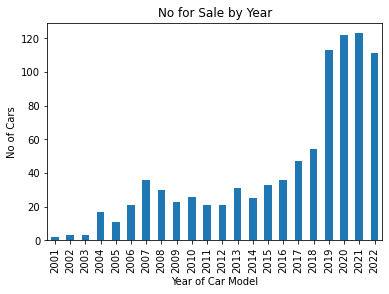

In [701]:
#plot graph of no of titles  
year_title_sale.plot(kind="bar")
plt.title('No for Sale by Year')
plt.xlabel('Year of Car Model')
plt.ylabel('No of Cars')
plt.show()

The figure above shows the number of cars for sale by year of manufacture. 2021 car models has the heighest number of  123 cars. There is very few cars manufactured between 2001 to 2003 for sale. 

### Compare car sales on their transmission features

In [702]:
# group the cars based on their transmission type
grouped_cars= aa_cars_master_df.groupby('transmission')


In [703]:
# count the number of cars with manual and automatic transmission
num_cars = grouped_cars['transmission'].count()
num_cars

transmission
Automatic    352
Manual       518
Other          1
Semi-auto     38
Name: transmission, dtype: int64

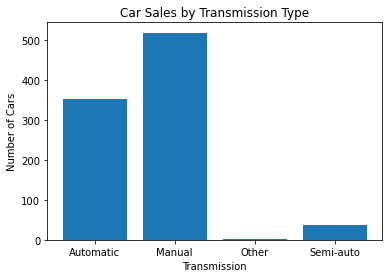

In [704]:
# plot the results using a bar plot
fig, ax = plt.subplots()
ax.bar(num_cars.index, num_cars.values)
ax.set_xlabel('Transmission')
ax.set_ylabel('Number of Cars')
ax.set_title('Car Sales by Transmission Type')
plt.show()


There are more manual transmission cars for sale than automatic transmission. 352 Automatic transmission cars, 
 518 Manual transmission cars ,  38 Semi-auto  , Other 1


### The most popular car sales based on the “Body Type”


In [707]:
# group the cars based on their body type
grouped_body_type = aa_cars_master_df.groupby('body_type')

In [736]:
# count the number of cars based on body type
body_type_num = grouped_body_type['body_type'].count()
body_type_num = body_type_num.sort_values(ascending=False)
body_type_num

body_type
Hatchback                 494
Suv                       189
Estate                     68
Panel van                  46
Mpv                        32
Saloon                     19
Convertible                18
Coupe                      11
Van                         5
Combi van                   5
Motor caravan               5
Pickup                      3
4x4                         3
Temperature controlled      2
Chassis cab                 2
Van derived car             2
N/a                         1
Cabriolet                   1
Station wagon               1
Minibus                     1
Window van                  1
Name: body_type, dtype: int64

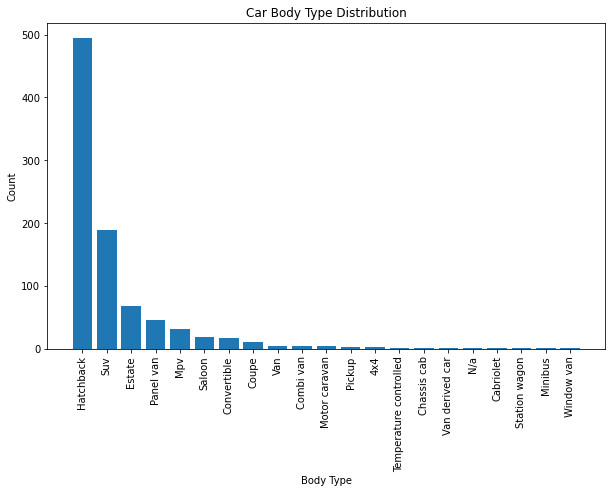

In [737]:
# plot the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(body_type_num.index, body_type_num.values)
ax.set_xlabel('Body Type')
ax.set_ylabel('Count')
ax.set_title('Car Body Type Distribution')
plt.xticks(rotation=90)
plt.show()

As shown in the graph, there are over 490 automobiles of the Hatchback body type, making it the most prevalent body type in the dataset. With over 190 vehicles, SUVs are the second most popular body style. With over 30 automobiles apiece, Estate, MPV, and Panel van are further popular body variants.

On the other hand, a small percentage of the automobiles in the sample have some very uncommon body forms. For instance, there is just one of each type of station waggon, cabriolet, window van, and temperature-controlled vehicle.


### List top 10 cars having highest numbers of reviews

In [725]:
grouped_reviews = aa_cars_master_df.groupby('make')['reviews'].sum()
# group the dataframe by country and sum the suicides_no column
#country_suicides = suicide_master_df.groupby('country')['suicides_no'].sum()
grouped_reviews

make
AUDI                32.0
Abarth               3.0
Audi               398.0
BMW                643.0
CITROEN             70.0
Chevrolet            4.0
Citroen           1457.0
Dacia              178.0
Ds                   1.0
FIAT                44.0
FORD               798.0
Fiat              1155.0
Ford             23425.0
HYUNDAI             64.0
Honda             1022.0
Hyundai           1588.0
Jaguar             577.0
Jeep                 2.0
KIA                 61.0
Kia               2927.0
Land Rover         549.0
Lexus              175.0
MERCEDES-BENZ       21.0
MG                  24.0
MINI                24.0
Mazda              241.0
Mercedes-Benz      690.0
Mini                12.0
Mitsubishi          46.0
NISSAN              73.0
Nissan            3289.0
PEUGEOT            103.0
PORSCHE             24.0
Peugeot           1420.0
Porsche             33.0
RENAULT            124.0
Renault           1962.0
SEAT               138.0
SKODA              354.0
SUBARU              

In [738]:
#group and slice the top ten [:10]
top_ten_cars = grouped_reviews.sort_values(ascending=False)[:10]


In [729]:
#top ten cars
top_ten_cars

make
Ford          23425.0
Toyota        17546.0
Vauxhall      12485.0
Nissan         3289.0
Kia            2927.0
Volkswagen     2054.0
Renault        1962.0
Hyundai        1588.0
Citroen        1457.0
Peugeot        1420.0
Name: reviews, dtype: float64

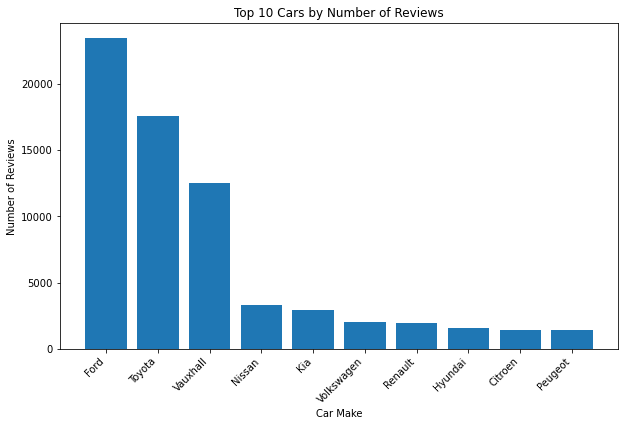

In [732]:

# plot the top 10 cars
plt.figure(figsize=(10, 6))
plt.bar(top_ten_cars.index, top_ten_cars.values)
plt.title('Top 10 Cars by Number of Reviews')
plt.xlabel('Car Make')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()

From the visual above , Ford has the most reviews (23,425), followed by Toyota (17,546) and Vauxhall (12,485). In terms of the number of reviews, these three automobile brands much outnumber the others.

Nissan, Kia, Volkswagen, Renault, Hyundai, Citroen, and Peugeot have got less reviews, with Nissan receiving the fourth-most (3,289) and Peugeot receiving the tenth-most (1,420).

This points to the popularity of certain automobile brands based on the amount of reviews from the dataset